In [2]:
import pandas as pd
import folium
import numpy as np
import matplotlib.pyplot as plt
# 2021-07-15일부터 2023-01-31일까지
file_path = './서울특별시_전동킥보드_견인_현황_20230131.csv' 
df = pd.read_csv(file_path, encoding = 'euc-kr')
# print(df)
# print(df.isnull().sum(axis=0))
df

,번호,신고일,구정보,주소,유형,조치일
0,1,2021-07-15,영등포구,서울특별시 영등포구 여의도동 84-10,보도와 차도가 구분된 도로의 차도,2021-07-15
1,2,2021-07-15,영등포구,서울특별시 영등포구 영등포동1가 97-4,보도 중앙,2021-07-15
2,3,2021-07-15,동작구,서울특별시 동작구 노량진동 231-2,보도와 차도가 구분된 도로의 차도,2021-07-15
3,4,2021-07-15,동작구,서울특별시 동작구 노량진동 54-3,"버스정류장, 택시 승강장",2021-07-15
4,5,2021-07-15,동작구,서울특별시 동작구 신대방동 460-30,보도와 차도가 구분된 도로의 차도,2021-07-15
...,...,...,...,...,...,...
88309,88310,2023-01-31,중구,서울특별시 중구 서소문동 37,오신고,2023-02-01
88310,88311,2023-01-31,동작구,서울특별시 동작구 노량진동 332,보도와 차도가 구분된 도로의 차도,2023-01-31
88311,88312,2023-01-31,동작구,서울특별시 동작구 대방동 415-40,기타,2023-02-01
88312,88313,2023-01-31,동작구,서울특별시 동작구 노량진동 329-16,기타,2023-02-01


In [6]:
print((df['유형'].isnull() | df['조치일'].isnull()).sum())

1


In [7]:
df = df.dropna(axis=0)
print(df)
print(df.isnull().sum(axis=0)) #누락데이터 제거

          번호         신고일   구정보                      주소                  유형  \
0          1  2021-07-15  영등포구   서울특별시 영등포구 여의도동 84-10  보도와 차도가 구분된 도로의 차도   
1          2  2021-07-15  영등포구  서울특별시 영등포구 영등포동1가 97-4               보도 중앙   
2          3  2021-07-15   동작구    서울특별시 동작구 노량진동 231-2  보도와 차도가 구분된 도로의 차도   
3          4  2021-07-15   동작구     서울특별시 동작구 노량진동 54-3       버스정류장, 택시 승강장   
4          5  2021-07-15   동작구   서울특별시 동작구 신대방동 460-30  보도와 차도가 구분된 도로의 차도   
...      ...         ...   ...                     ...                 ...   
88309  88310  2023-01-31    중구        서울특별시 중구 서소문동 37                 오신고   
88310  88311  2023-01-31   동작구      서울특별시 동작구 노량진동 332  보도와 차도가 구분된 도로의 차도   
88311  88312  2023-01-31   동작구    서울특별시 동작구 대방동 415-40                  기타   
88312  88313  2023-01-31   동작구   서울특별시 동작구 노량진동 329-16                  기타   
88313  88314  2023-01-31   동작구  서울특별시 동작구 노량진동 225-102                  기타   

              조치일  
0      2021-07-15  
1      2021-07-15  
2  

In [8]:
TOWING_TYPE = df['유형'].value_counts().sort_index()
print(TOWING_TYPE)

건물, 상가 보행자 진출입          277
계단, 난간                    7
기타                     2997
버스정류장, 택시 승강장          8783
보도 중앙                  5568
보도와 차도가 구분된 도로의 차도    44964
소방시설 5m 이내 구역            41
오신고                     142
육교위, 지하보차도 안             10
자전거 도로                 5446
점자블록, 엘리베이터 입구         4758
지하철역 진출입로 및 주변         3721
턱을 낮춘 진출입로               24
통행제한 구간                   8
횡단보도, 산책로 등           11567
Name: 유형, dtype: int64


In [15]:
# df = df[df['유형'] != "기타"]
df = df[df['유형'] != "오신고"] #오신고랑 기타 제거

TOWING_TYPE = dict(df['유형'].value_counts())
print(TOWING_TYPE)

{'보도와 차도가 구분된 도로의 차도': 44964, '횡단보도, 산책로 등': 11567, '버스정류장, 택시 승강장': 8783, '보도 중앙': 5568, '자전거 도로': 5446, '점자블록, 엘리베이터 입구': 4758, '지하철역 진출입로 및 주변': 3721, '기타': 2997, '건물, 상가 보행자 진출입': 277, '소방시설 5m 이내 구역': 41, '턱을 낮춘 진출입로': 24, '육교위, 지하보차도 안': 10, '통행제한 구간': 8, '계단, 난간': 7}


<BarContainer object of 14 artists>

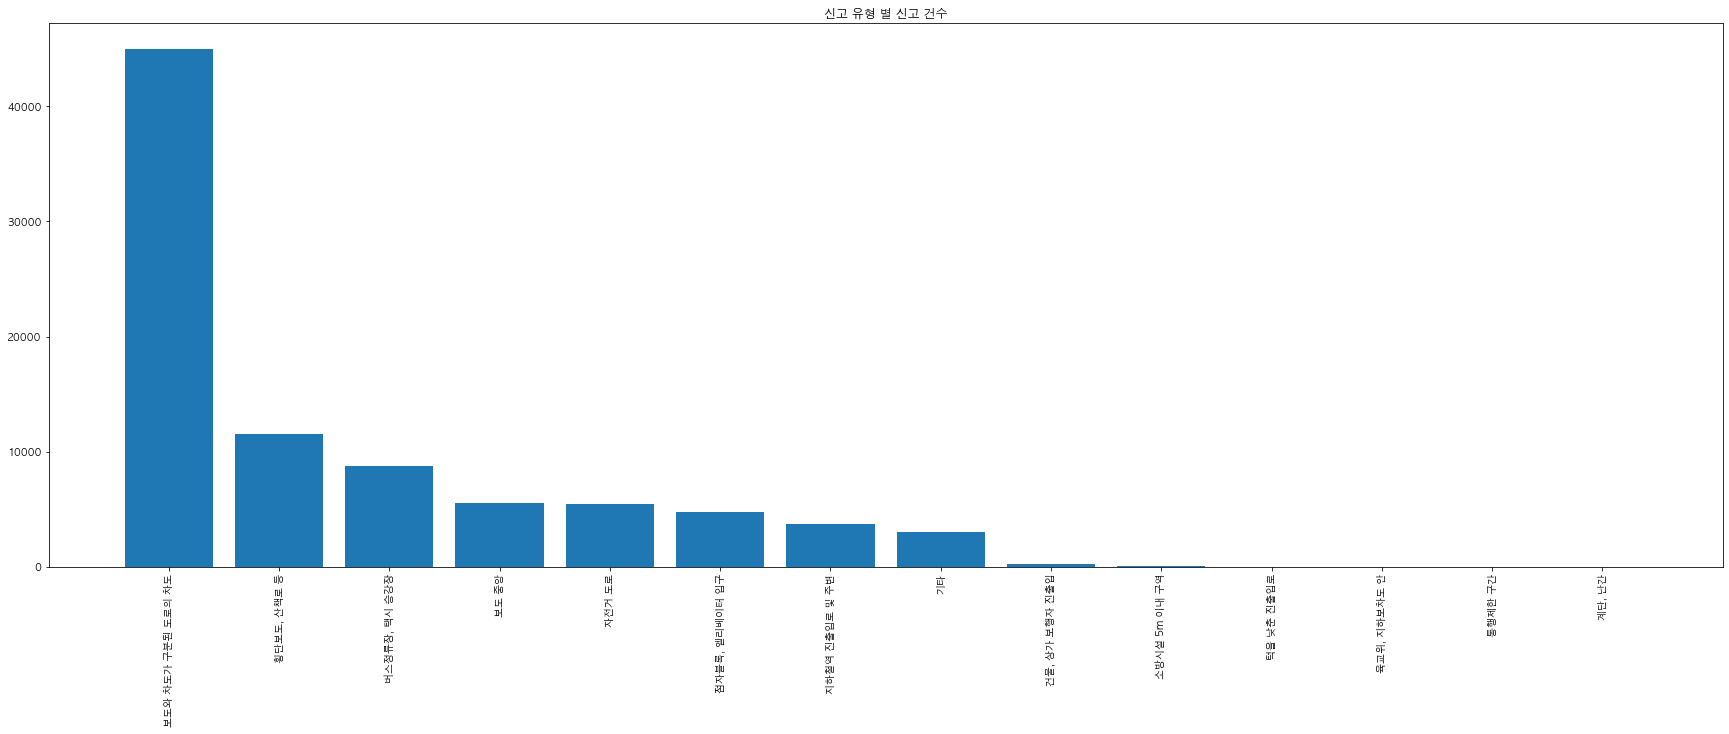

In [25]:
# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
# font_path = "./malgun.ttf"   #폰트파일의 위치
# font_name = font_manager.FontProperties(fname=font_path).get_name()
font_name = 'AppleGothic'
plt.rc('font', family=font_name)
# print(plt.rcParams['font.family'])
plt.figure(figsize=(30,10))
plt.title('신고 유형 별 신고 건수')
plt.xticks(rotation=90)
plt.bar(TOWING_TYPE.keys(), TOWING_TYPE.values())

In [12]:
df

,번호,신고일,구정보,주소,유형,조치일
0,1,2021-07-15,영등포구,서울특별시 영등포구 여의도동 84-10,보도와 차도가 구분된 도로의 차도,2021-07-15
1,2,2021-07-15,영등포구,서울특별시 영등포구 영등포동1가 97-4,보도 중앙,2021-07-15
2,3,2021-07-15,동작구,서울특별시 동작구 노량진동 231-2,보도와 차도가 구분된 도로의 차도,2021-07-15
3,4,2021-07-15,동작구,서울특별시 동작구 노량진동 54-3,"버스정류장, 택시 승강장",2021-07-15
4,5,2021-07-15,동작구,서울특별시 동작구 신대방동 460-30,보도와 차도가 구분된 도로의 차도,2021-07-15
...,...,...,...,...,...,...
88308,88309,2023-01-31,관악구,서울특별시 관악구 봉천동 산57-3,보도와 차도가 구분된 도로의 차도,2023-01-31
88310,88311,2023-01-31,동작구,서울특별시 동작구 노량진동 332,보도와 차도가 구분된 도로의 차도,2023-01-31
88311,88312,2023-01-31,동작구,서울특별시 동작구 대방동 415-40,기타,2023-02-01
88312,88313,2023-01-31,동작구,서울특별시 동작구 노량진동 329-16,기타,2023-02-01


In [8]:
REGISTER_DATE = df['신고일'].value_counts()
print(REGISTER_DATE)

# print(df.loc[df['신고일']=='2022-09-13'])

2022-03-10    443
2022-09-13    438
2022-03-17    414
2022-06-07    412
2022-03-15    401
             ... 
2022-06-30     72
2021-08-27     68
2022-11-24     51
2022-11-25     51
2021-07-15     35
Name: 신고일, Length: 383, dtype: int64


In [9]:
ACTION_DATE = df['조치일'].value_counts()
print(ACTION_DATE)

# print(df.loc[df['신고일']=='2022-09-13'])

2022-03-10    443
2022-09-13    433
2022-03-17    413
2022-06-07    410
2022-02-15    401
             ... 
2022-11-25     52
2022-11-24     49
2021-07-15     32
2023-02-01      3
2022-05-01      1
Name: 조치일, Length: 385, dtype: int64


In [10]:
# GU = df['구정보'].value_counts().sort_index()
GU = df['구정보'].value_counts()
print(GU)

마포구     9642
송파구     8948
성동구     7356
영등포구    7345
강남구     6802
서초구     5626
동작구     5044
관악구     4455
동대문구    3662
강서구     3604
용산구     3133
광진구     2959
강동구     2779
중랑구     2591
노원구     2034
도봉구     2034
서대문구    2024
구로구     1418
중구      1394
종로구     1383
양천구     1306
강북구     1178
성북구     1065
은평구      387
금천구        2
Name: 구정보, dtype: int64


In [4]:
file_path_ = './서울시 대학 및 전문대학 DB 정보 (한국어).csv'
dfu = pd.read_csv(file_path_, encoding = 'euc-kr')

dfu = dfu[['학교명','주소','행정시','행정구']]
dfu

,학교명,주소,행정시,행정구
0,서울시립대학교,서울 동대문구 서울시립대로 163 (전농동 90번지),서울특별시,동대문구
1,서울여자간호대학교,서울 서대문구 홍제3동 서울여자간호대학,서울특별시,서대문구
2,서울여자대학교,서울특별시 노원구 화랑로 621 서울여자대학교,서울특별시,노원구
3,서일대학교,서울 중랑구 서일대학길 22(면목동 49-3) 서일대학교,서울특별시,중랑구
4,성공회대학교,서울 구로구 항동 성공회대학교,서울특별시,구로구
...,...,...,...,...
59,서울교육대학교,서울 서초구 서초중앙로 96(서초동 1650),서울특별시,서초구
60,서울기독대학교,서울 은평구 갈현로 4길 26-2호,서울특별시,은평구
61,서울대학교,서울 관악구 관악로 1 서울대학교,서울특별시,관악구
62,서울디지털대학교,서울 마포구 도화동 560번지,서울특별시,마포구


In [27]:
file_path2 = './서울시 전동킥보드 주차구역 현황.csv' #영등포구가 없다....!!!!!!
dfp = pd.read_csv(file_path2, encoding = 'euc-kr')

#중복제거
dfp = dfp.drop_duplicates()
print(dfp)

GUP = dfp['시군구명'].value_counts().sort_index()
print(GUP)

      순번 시군구명          주소                           상세위치 거치대 유무  거치대 크기
0      1  종로구  팔판동 115-63                 청와대 춘추문 맞은편 인근      Y     6.0
1      2  종로구   연건동 218-1                   KT광화문 혜화지사 앞      Y     6.0
2      3  종로구   연건동 178-3                  홍익대학교 대학로 맞은편      Y     6.0
3      4  종로구    동승동 1-24                   대학로 마로니에공원 앞      Y     8.0
4      5  종로구    와룡동 75-4                        연악사 맞은편      Y     8.0
..   ...  ...         ...                            ...    ...     ...
188  188  강동구    명일동 46-5                   고덕역 4번 출구 인근      N     NaN
189  189  강동구   명일동 303-1                   명일역 2번 출구 인근      N     NaN
190  190  강동구     암사동 524                       선사고등학교 앞      Y     8.0
191  191  강동구   강일동 679-6        강동공영차고지 버스정류장(25101) 인근      Y     6.0
192  192  강동구     강일동 681  강일리버파크3단지308동 버스정류장(25521) 인근      Y     6.0

[192 rows x 6 columns]
강남구     10
강동구      5
강북구      9
강서구     22
관악구      6
광진구      1
구로구      2
금천구      5
노원구      4
도봉구      4
동대

In [28]:
dfp

,순번,시군구명,주소,상세위치,거치대 유무,거치대 크기
0,1,종로구,팔판동 115-63,청와대 춘추문 맞은편 인근,Y,6.0
1,2,종로구,연건동 218-1,KT광화문 혜화지사 앞,Y,6.0
2,3,종로구,연건동 178-3,홍익대학교 대학로 맞은편,Y,6.0
3,4,종로구,동승동 1-24,대학로 마로니에공원 앞,Y,8.0
4,5,종로구,와룡동 75-4,연악사 맞은편,Y,8.0
...,...,...,...,...,...,...
188,188,강동구,명일동 46-5,고덕역 4번 출구 인근,N,NaN
189,189,강동구,명일동 303-1,명일역 2번 출구 인근,N,NaN
190,190,강동구,암사동 524,선사고등학교 앞,Y,8.0
191,191,강동구,강일동 679-6,강동공영차고지 버스정류장(25101) 인근,Y,6.0


In [12]:
df_combined = pd.concat([GU, GUP], axis=1)

df_combined.columns = ['불법주차', '주차구역']

df_combined['주차구역'] = df_combined['주차구역'].fillna(0).astype(int)

#비율 
# df_combined['Ratio'] = df_combined['불법주차'] / df_combined['주차구역']

# df_combined['Ratio'] = df_combined['Ratio'].round(1)

print(df_combined.head(10))

      불법주차  주차구역
마포구   9642    10
송파구   8948     7
성동구   7356     1
영등포구  7345     0
강남구   6802    10
서초구   5626    50
동작구   5044     4
관악구   4455     6
동대문구  3662    15
강서구   3604    22


구별 불법 주차 지도 입지 이거 시각화 필요 -> 중간 발표에는 있어야한다!

In [13]:
file_path3 = './행정구역_20230513133737.csv'
seouldf = pd.read_csv(file_path3, encoding = 'utf-8')
print(seouldf)
print(seouldf['2021'].sort_index())

    자치구별(1)  자치구별(2)      2021   2021.1  2021.2  2021.3 2021.4 2021.5
0   자치구별(1)  자치구별(2)        면적       면적       동       동  통 (개)  반 (개)
1   자치구별(1)  자치구별(2)  면적 (km²)  구성비 (%)  행정 (개)  법정 (개)     소계     소계
2       서울시       소계    605.24   100.00     426     466  12859  96471
3       서울시      종로구     23.91     3.95      17      87    279   1475
4       서울시       중구      9.96     1.65      15      74    253   1580
5       서울시      용산구     21.87     3.61      16      36    356   2597
6       서울시      성동구     16.86     2.79      17      17    471   3645
7       서울시      광진구     17.06     2.82      15       7    370   3012
8       서울시     동대문구     14.22     2.35      14      10    360   2631
9       서울시      중랑구     18.50     3.06      16       6    558   4241
10      서울시      성북구     24.58     4.06      20      39    468   3671
11      서울시      강북구     23.60     3.90      13       4    389   3381
12      서울시      도봉구     20.65     3.41      14       4    396   2993
13      서울시      노원구

In [14]:
import geopandas as gpd
gpd.read_file('./LARD_ADM_SECT_SGG_서울', encoding = 'euc-kr')

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,GID,geometry
0,11740,강동구,NaN,11740,125,"POLYGON ((971595.075 1952405.815, 971596.036 1..."
1,11710,송파구,NaN,11710,126,"POLYGON ((965821.957 1949386.153, 965816.737 1..."
2,11680,강남구,NaN,11680,127,"POLYGON ((959331.597 1948602.068, 959342.021 1..."
3,11650,서초구,NaN,11650,128,"POLYGON ((956982.039 1947144.037, 956982.518 1..."
4,11620,관악구,NaN,11620,129,"POLYGON ((949438.997 1944127.713, 949456.647 1..."
5,11590,동작구,NaN,11590,130,"POLYGON ((951811.770 1946444.671, 951885.519 1..."
6,11560,영등포구,NaN,11560,131,"POLYGON ((945280.001 1950949.319, 945361.246 1..."
7,11545,금천구,NaN,11545,132,"POLYGON ((944705.924 1943086.537, 944706.472 1..."
8,11530,구로구,NaN,11530,133,"POLYGON ((945165.294 1946679.190, 945362.702 1..."
9,11500,강서구,NaN,11500,134,"POLYGON ((939006.015 1955916.461, 939036.124 1..."


In [15]:
# -*- coding: utf-8 -*-
seoul_map = folium.Map(location=[37.55,126.98], zoom_start=12)

seoul_map.save('./seoul.html')

In [16]:
import geopandas as gpd
import folium

data = gpd.read_file('./LARD_ADM_SECT_SGG_서울', encoding='euc-kr')

seoul_map = folium.Map(location=[37.55, 126.98], zoom_start=12)

folium.GeoJson(data).add_to(seoul_map)

# folium.Choropleth(
#     geo_data=data,
#     data=GU,
#     columns=['구정보', 'count'],
# #     key_on='feature.properties.구정보',
#     fill_color='YlGn',
#     fill_opacity=0.7,
#     line_opacity=0.2,
#     legend_name='Number of Districts per Borough'
# ).add_to(seoul_map)

seoul_map.save('./seoul.html')

In [17]:
ingu = pd.read_csv('주민등록인구.csv')
ingu = ingu[['동별(2)', '2023 1/4']]
ingu = ingu.iloc[2:]

In [18]:
ingu.columns = ['구', '인구']
ingu.columns
ingu = ingu.astype({'인구': int})
ingu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 2 to 26
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구       25 non-null     object
 1   인구      25 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 532.0+ bytes


In [19]:
ingusu = {
    k : v for k, v in zip(ingu['구'], ingu['인구'])
}

In [20]:
ingugu=ingusu.keys()
inguvals = ingusu.values()
# plt.rc('font', family='Malgun Gothic') # For Windows
# # print(plt.rcParams['font.family'])
# plt.figure(figsize=(11,6))
# plt.title('구 별 인구 수')
# plt.xticks(rotation=45)
# plt.bar(ingugu, inguvals)

In [21]:
dstDict=dict(df['구정보'].value_counts().sort_values(ascending=False))

In [22]:
dstDict = sorted(dstDict.items())
ingusu = sorted(ingusu.items())
dstDict=dict(dstDict)
ingusu=dict(ingusu)

In [23]:
ratio = []
dlist, ilist = list(dstDict.values()), list(ingusu.values())
for d, i in zip(dlist, ilist):
    ratio.append(round(100*d/i, 5))

In [24]:
gus = list(dstDict.keys())

In [25]:
singo_per_ingu = {k:v for k, v in zip(gus, ratio)}
singo_per_ingu = sorted(singo_per_ingu.items(), key= lambda x: x[1], reverse=True)
singo_per_ingu = dict(singo_per_ingu)

In [28]:
ingugu=singo_per_ingu.keys()
inguvals = singo_per_ingu.values()
# plt.rc('font', family='Malgun Gothic') # For Windows
# print(plt.rcParams['font.family'])
# plt.figure(figsize=(11,6))
# plt.title('구 별 인구 대비 신고 비율 (%)')
# plt.xticks(rotation=45)
# plt.bar(ingugu, inguvals)

In [29]:
df['신고일'] = pd.to_datetime(df['신고일'])
df['조치일'] = pd.to_datetime(df['조치일'])

In [30]:
df['month'] = df['신고일'].dt.month
df['day'] = df['신고일'].dt.weekday

In [31]:
# 2021-07-15 ~ 2022-07-14까지로 바꿔서 그래프 다시..?

In [32]:
df['time_delay'] = df['조치일']-df['신고일']

In [33]:
df_time =  df.sort_values(by='time_delay' ,ascending=False)
df_time

,번호,신고일,구정보,주소,유형,조치일,month,day,time_delay
84000,84001,2022-12-27,영등포구,서울특별시 영등포구 대림동 669-3,보도와 차도가 구분된 도로의 차도,2023-01-26,12,1,30 days
31726,31727,2022-02-24,서초구,서울특별시 서초구 서초동 1748-51,기타,2022-03-24,2,3,28 days
82018,82019,2022-12-12,강남구,서울특별시 강남구 삼성동 25,보도 중앙,2023-01-09,12,0,28 days
81787,81788,2022-12-12,동작구,서울특별시 동작구 본동 484,보도 중앙,2023-01-09,12,0,28 days
82638,82639,2022-12-16,서대문구,서울특별시 서대문구 북아현동 156-41,보도와 차도가 구분된 도로의 차도,2023-01-09,12,4,24 days
...,...,...,...,...,...,...,...,...,...
29431,29432,2022-02-14,성동구,서울특별시 성동구 성수동2가 289-262,"횡단보도, 산책로 등",2022-02-14,2,0,0 days
29430,29431,2022-02-14,강동구,서울특별시 강동구 둔촌동 543-26,"횡단보도, 산책로 등",2022-02-14,2,0,0 days
29429,29430,2022-02-14,서초구,서울특별시 서초구 방배동 912-14,"횡단보도, 산책로 등",2022-02-14,2,0,0 days
29428,29429,2022-02-14,관악구,서울특별시 관악구 봉천동 1712-13,"횡단보도, 산책로 등",2022-02-14,2,0,0 days


In [ ]:
df_time.info()